In [54]:
%matplotlib inline
import numpy as np
from numpy import random
import pickle
import os
from scipy import misc
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import gc
import xml.etree.ElementTree as ET

In [55]:
gt_train = pickle.load(open('../../data/datasetQuinn/curated/gt_train_fal_wbc_prep.pickle', 'rb'))

In [56]:
def get_annotations_for_a_single_image(imgfilename):
    tree = ET.parse(imgfilename)
    root = tree.getroot()
    
    annotations, labels = [], []
    for obj in root.findall('object'):
        cls = obj.findtext('name')
        box = obj.find('bndbox') 
        xmin = box.findtext('xmin')
        xmax = box.findtext('xmax')
        ymin = box.findtext('ymin')
        ymax = box.findtext('ymax')
        
        annotations.append(np.float32((ymin, xmin, ymax, xmax)))
        if cls == 'falciparum':
            labels.append((1, 0))
        else:
            labels.append((0, 1))
                           
    return np.array(annotations), np.array(labels)

In [57]:
a, b = get_annotations_for_a_single_image('../../data/datasetQuinn/curated/preprocess/samples/f1_1.xml')
a, b

(array([[ 149.,   68.,  226.,  145.],
        [ 334.,  162.,  512.,  391.]], dtype=float32), array([[1, 0],
        [1, 0]]))

In [58]:
def plt_bboxes_original(img, classes, bboxes, saveas, figsize=(10,10), linewidth=1.5):
    """Visualize bounding boxes. Largely inspired by SSD-MXNET!
    """
    fig = plt.figure(figsize=figsize)
    plt.imshow(img)
#     height = img.shape[0]
#     width = img.shape[1]
    

    colors = (random.random(), random.random(), random.random())
    if bboxes.any():
        for i in range(len(bboxes)):
            ymin = int(bboxes[i, 0]) #* height)
            xmin = int(bboxes[i, 1]) #* width)
            ymax = int(bboxes[i, 2]) #* height)
            xmax = int(bboxes[i, 3]) #* width)
            
            rect = plt.Rectangle((xmin, ymin), xmax - xmin,
                                 ymax - ymin, fill=False,
                                 label=None,
                                 edgecolor=colors,
                                 linewidth=linewidth)

            plt.gca().add_patch(rect)
    plt.show()
#     fig.savefig(saveas + '.jpg')
#     plt.close(fig)
#     del img, bboxes, fig
#     gc.collect()

In [59]:
def to_relative_coordinates(boxes, shape):
    '''
        Absolute pixel values into relative ones.
        Also, reordering of coordinates to match tf implementation.

    :param boxes: numpy array. coordinates of bounding boxes (N x 4)
    :param shape: tuple. image shape.

    :return: (ymin, xmin, ymax, xmax)
    '''

    ymin, xmin, ymax, xmax = boxes.T

    xmin = xmin / float(shape[1])
    xmax = xmax / float(shape[1])
    ymin = ymin / float(shape[0])
    ymax = ymax / float(shape[0])

    return np.concatenate([ymin[:, None], xmin[:, None], ymax[:, None], xmax[:, None]], axis=-1)

(array([[  6.07000000e+02,   4.07000000e+02,   6.89000000e+02,
          4.72000000e+02],
       [  2.07000000e+02,   1.93000000e+02,   2.81000000e+02,
          2.70000000e+02],
       [  1.52000000e+02,   5.83000000e+02,   2.32000000e+02,
          6.54000000e+02],
       [  1.37000000e+03,   1.42000000e+02,   1.44400000e+03,
          2.11000000e+02],
       [  1.50100000e+03,   7.74000000e+02,   1.56800000e+03,
          8.36000000e+02],
       [  1.55400000e+03,   8.36000000e+02,   1.62800000e+03,
          9.07000000e+02],
       [  1.23200000e+03,   9.74000000e+02,   1.31700000e+03,
          1.07000000e+03],
       [  1.08500000e+03,   1.04000000e+03,   1.15600000e+03,
          1.11300000e+03],
       [  8.72000000e+02,   1.27600000e+03,   9.38000000e+02,
          1.34200000e+03],
       [  6.72000000e+02,   1.44200000e+03,   7.75000000e+02,
          1.51700000e+03],
       [  1.33400000e+03,   1.32700000e+03,   1.40100000e+03,
          1.41300000e+03],
       [  1.15000000

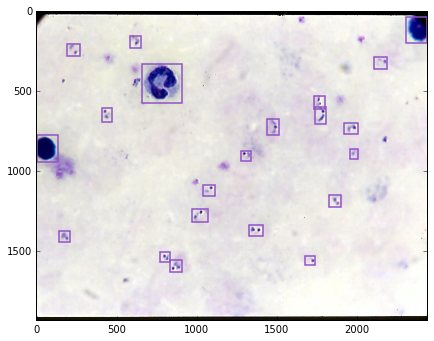

KeyboardInterrupt: 

In [60]:
for key, value in gt_train.items():
    if key.startswith(('f', 'PF')):
        annofile = '../../data/datasetQuinn/samples/' + key + '.xml'
        if os.path.exists(annofile):
#             annotations = get_annotations_for_a_single_image(annofile)
#             gt_train[key] = annotations
            bboxes, labels = get_annotations_for_a_single_image(annofile)
            print(bboxes, labels)
            img = misc.imread(os.path.join('../../data/datasetQuinn/curated/preprocess/train/', key)) / 255.
            plt_bboxes_original(img, np.array([1, 2]), bboxes, None, figsize=(7,7), linewidth=1.5)
            raw_input()

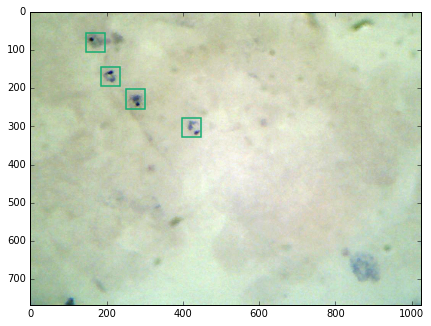

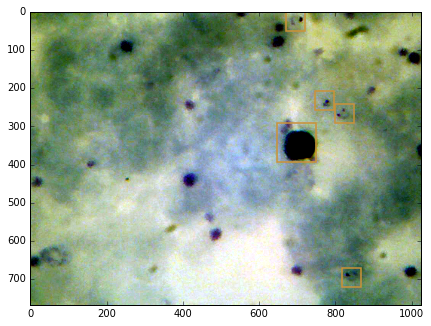

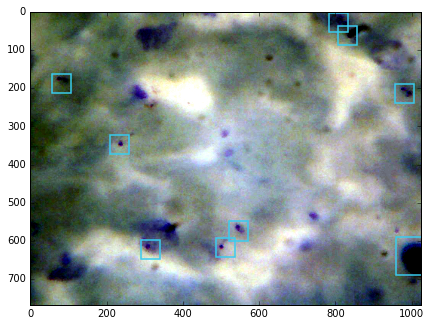

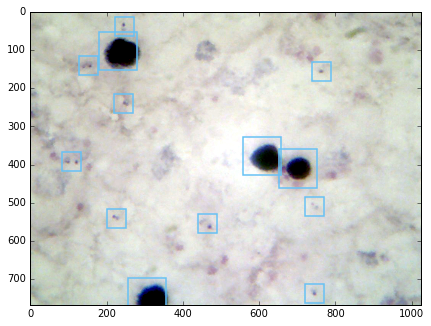

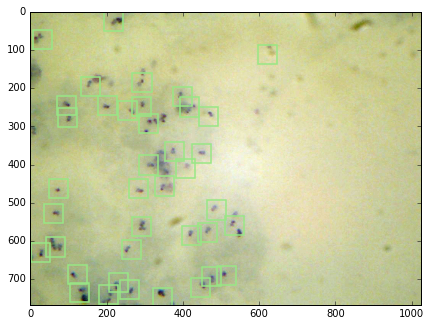

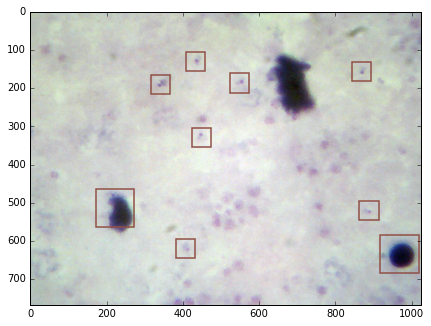

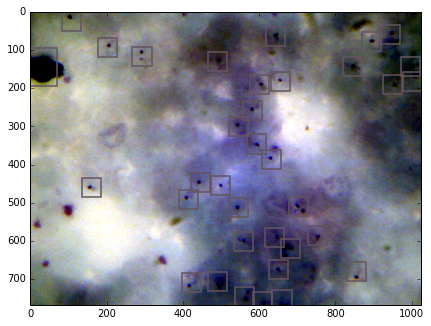

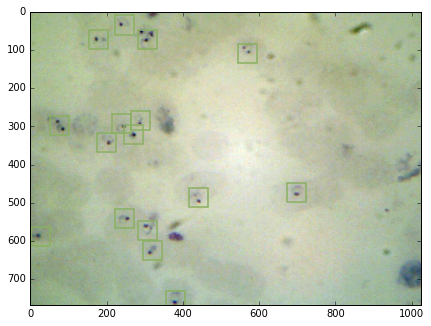

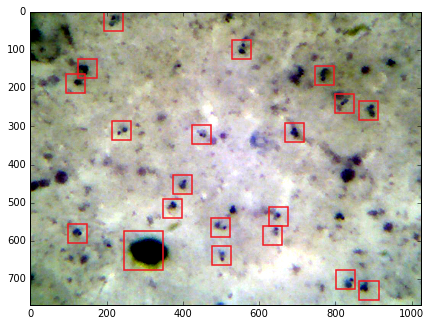

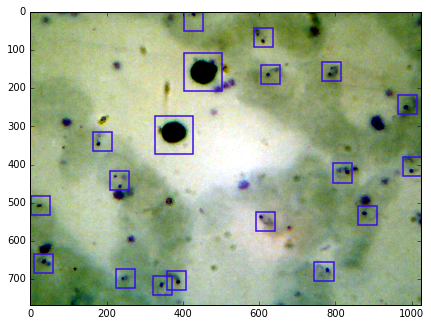

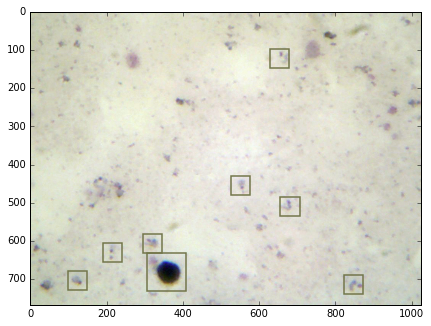

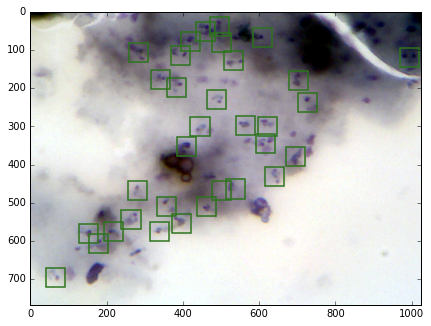

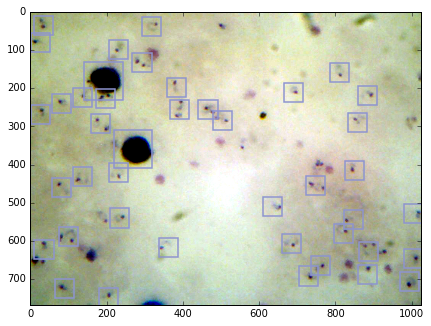

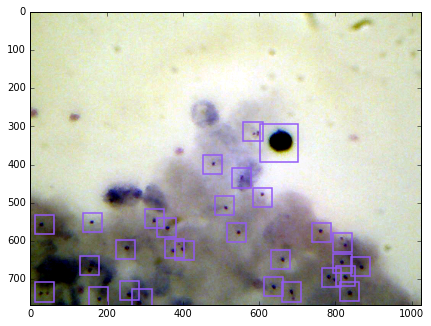

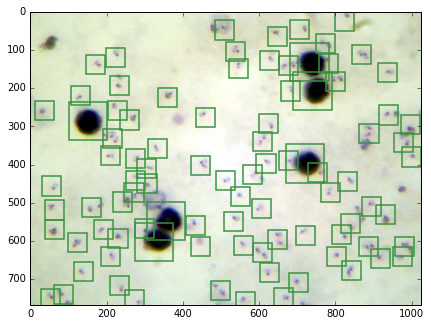

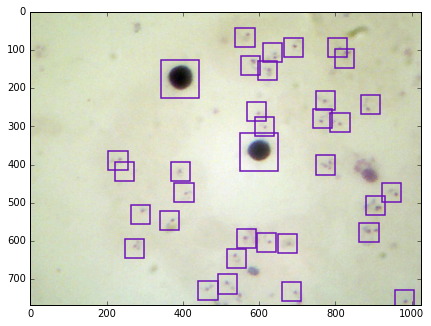

KeyboardInterrupt: 

In [62]:
for key, value in gt_train.items():
    bboxes, labels = value
    img = misc.imread(os.path.join('../../data/datasetQuinn/curated/preprocess/train/', key)) / 255.
    plt_bboxes_original(img, np.array([1, 2]), bboxes, None, figsize=(7,7), linewidth=1.5)
    raw_input()

In [52]:
for key, value in gt_train.items():
    if key == 'PF5 (heavy parasitaemia)':
        del gt_train[key]

In [53]:
pickle.dump( gt_train, open('../../data/datasetQuinn/curated/gt_train_fal_wbc_prep.pickle', 'wb'))

607.0